In [1]:
import os
import sys
main_folder = os.path.abspath(os.path.join(os.getcwd(), '..')) #Folder that contains MFPy
sys.path.append(main_folder)
import MFPy
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Common inputs
N_points = 500
gamma = np.zeros(N_points) #Inclination angle (rad)
Vx = np.zeros(N_points) #Longitudinal speed (m/s)


#Reading tir file
tir_file = os.path.join(main_folder,'sample/tir/sample.tir') #Tir file
tir_coeff = MFPy.PreProcessing.read_tir(tir_file) #Dict .tir coeffs

#### Longitudinal slip (alpha = 0)

##### Fz = 5000 N

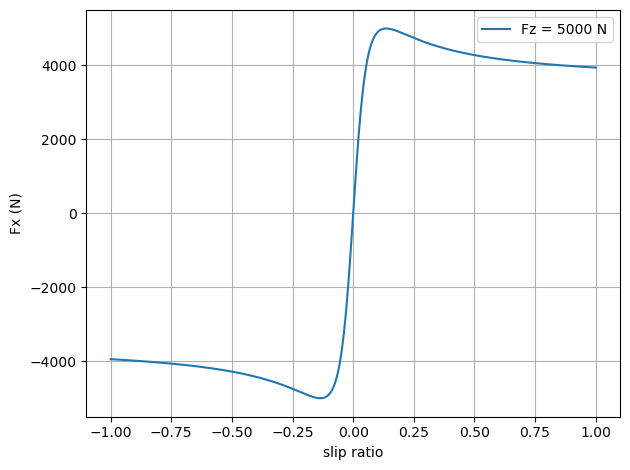

In [3]:
#Inputs
alpha = np.zeros(N_points) #Slip angle (rad)
kappa = np.linspace(-1,1,N_points) #Slip ratio (%/100) 
Fz = np.ones(N_points)*5000 #Fz (N)
input_values = [alpha, kappa, gamma, Fz, Vx] #input values as list

result = MFPy.solve(input_values,tir_coeff,check_limits=False) #Solving
#Graph
fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('slip ratio')
ax1.set_ylabel('Fx (N)')
ax1.grid()
ax1.plot(result['kappa'],result['Fx'],label='Fz = 5000 N')
ax1.legend()
fig.tight_layout()


##### Fz = 500 to 5000 N

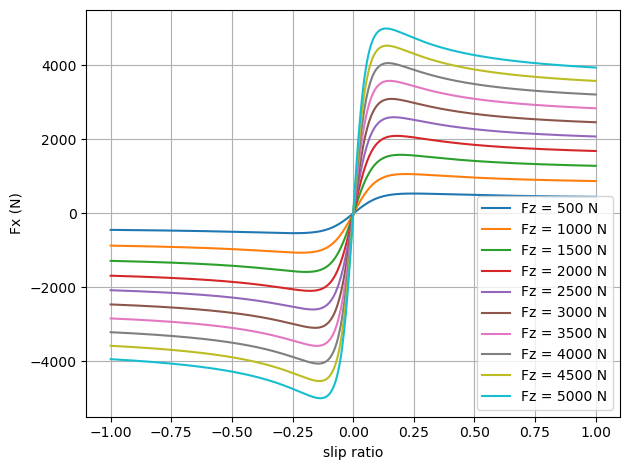

In [4]:
#Inputs
alpha = np.zeros(N_points) #Slip angle (rad)
kappa = np.linspace(-1,1,N_points) #Slip ratio (%/100) 

fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('slip ratio')
ax1.set_ylabel('Fx (N)')
ax1.grid()
for i in range(1,11):
    Fz = np.ones(N_points)*500*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = MFPy.solve(input_values,tir_coeff,check_limits=False) #Solving
    ax1.plot(result['kappa'],result['Fx'],label='Fz = {} N'.format(500*i))
ax1.legend()
fig.tight_layout()

#### Pure cornering (kappa = 0)

##### Fz = 500 to 5000 N

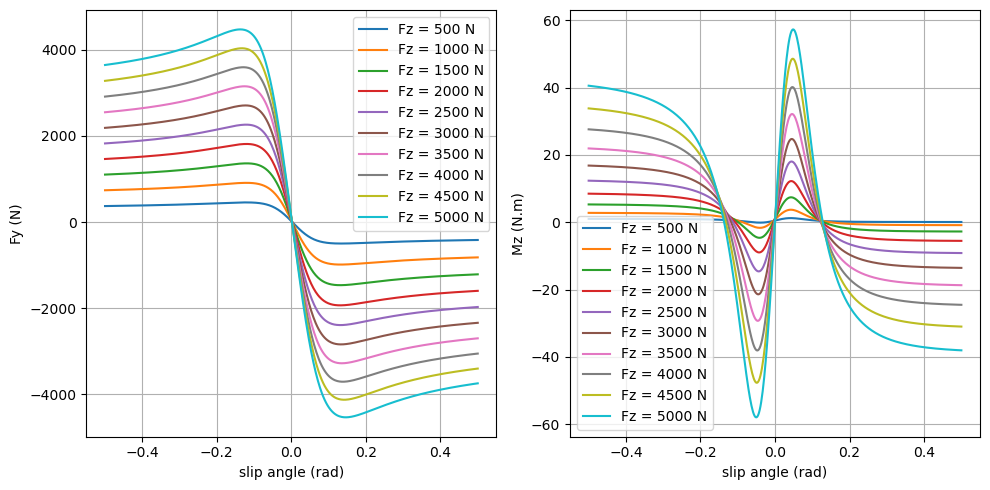

In [11]:
#Inputs
alpha = np.linspace(-0.5,0.5,N_points) #Slip angle (rad)
kappa= np.zeros(N_points) #Slip ratio (%/100) 

#Graph
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_xlabel('slip angle (rad)')
ax1.set_ylabel('Fy (N)')
ax1.grid()
ax2.set_xlabel('slip angle (rad)')
ax2.set_ylabel('Mz (N.m)')
ax2.grid()
for i in range(1,11):
    Fz = np.ones(N_points)*500*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = MFPy.solve(input_values,tir_coeff,check_limits=False) #Solving
    ax1.plot(result['alpha'],result['Fy'],label='Fz = {} N'.format(500*i))
    ax2.plot(result['alpha'],result['Mz'],label='Fz = {} N'.format(500*i))
ax1.legend()
ax2.legend()
fig.tight_layout()


### Combined (traction circle)

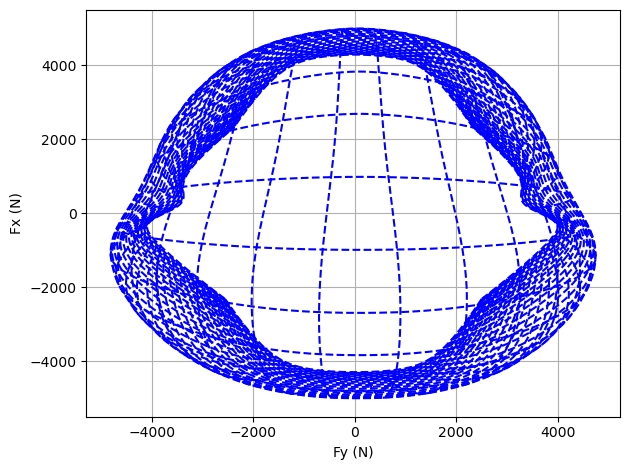

In [25]:
Fz = np.ones(N_points)*5000
alpha = np.linspace(-0.49,0.49,N_points)

fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('Fy (N)')
ax1.set_ylabel('Fx (N)')
ax1.grid()

for i in np.linspace(-0.49,0.49,50):
    kappa = np.ones(N_points)*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = MFPy.solve(input_values,tir_coeff,check_limits=True) #Solving
    ax1.plot(result['Fy'],result['Fx'],'b--')

kappa = np.linspace(-0.49,0.49,N_points)
for i in np.linspace(-0.49,0.49,50):
    alpha = np.ones(N_points)*i
    input_values = [ alpha, kappa, gamma, Fz, Vx]
    result = MFPy.solve(input_values,tir_coeff,check_limits=True) #Solving)
    ax1.plot(result['Fy'],result['Fx'],'b--')


fig.tight_layout()